libraries

In [12]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [13]:
img = cv.imread('smarties.png', cv.IMREAD_GRAYSCALE)

_, mask = cv.threshold(img, 220, 255, cv.THRESH_BINARY_INV)

kernal = np.ones((5,5), np.uint8)

1. Dilation
It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won’t come back, but our object area increases. It is also useful in joining broken parts of an object.

In [14]:
dilation = cv.dilate(mask, kernal, iterations=2)
cv.imshow('dilate',dilation)
cv.imshow('mask',mask)
cv.imshow('img',img)
cv.waitKey(0)
cv.destroyAllWindows()    

2. Erosion
The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what does it do? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

In [15]:
erosion = cv.erode(mask, kernal, iterations=1)
cv.imshow('erosion',erosion)
cv.imshow('mask',mask)
cv.imshow('img',img)
cv.waitKey(0)
cv.destroyAllWindows()  


3. Opening
Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv2.morphologyEx()

In [16]:
opening = cv.morphologyEx(mask, cv.MORPH_OPEN, kernal)
cv.imshow('opening',opening)
cv.imshow('mask',mask)
cv.imshow('img',img)
cv.waitKey(0)
cv.destroyAllWindows()  


4. Closing
Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

In [17]:
closing = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernal)
cv.imshow('closing',closing)
cv.imshow('mask',mask)
cv.imshow('img',img)
cv.waitKey(0)
cv.destroyAllWindows()  



5. Morphological Gradient
It is the difference between dilation and erosion of an image.
The result will look like the outline of the object.

In [18]:
mg = cv.morphologyEx(mask, cv.MORPH_GRADIENT, kernal)
cv.imshow('mg',mg)
cv.imshow('mask',mask)
cv.imshow('img',img)
cv.waitKey(0)
cv.destroyAllWindows() 


6. Top Hat
It is the difference between input image and Opening of the image. Below example is done for a 9x9 kernel.

In [19]:
th = cv.morphologyEx(mask, cv.MORPH_TOPHAT, kernal)
cv.imshow('th',th)
cv.imshow('mask',mask)
cv.imshow('img',img)
cv.waitKey(0)
cv.destroyAllWindows() 

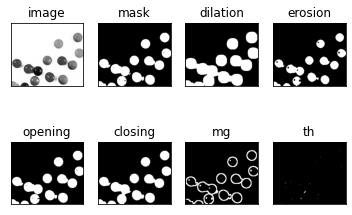

In [22]:
#with matplotlib
titles = ['image', 'mask', 'dilation', 'erosion', 'opening', 'closing', 'mg', 'th']
images = [img, mask, dilation, erosion, opening, closing, mg, th]
for i in range(8):
    plt.subplot(2, 4, i+1), plt.imshow(images[i], 'gray')      
    plt.title(titles[i])      
    plt.xticks([]),plt.yticks([])#ticks      
plt.show()#show

In [21]:
# with opencv
cv.imshow('opening',opening)
cv.imshow('closing',closing)
cv.imshow('erosion',erosion)
cv.imshow('dilate',dilation)
cv.imshow('mask',mask)
cv.imshow('img',img)
cv.waitKey(0)
cv.destroyAllWindows()  

resources

https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html